In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [3]:
#Splitting Data into Training and Test Sets
# test_size: what proportion of original data is used for test set
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

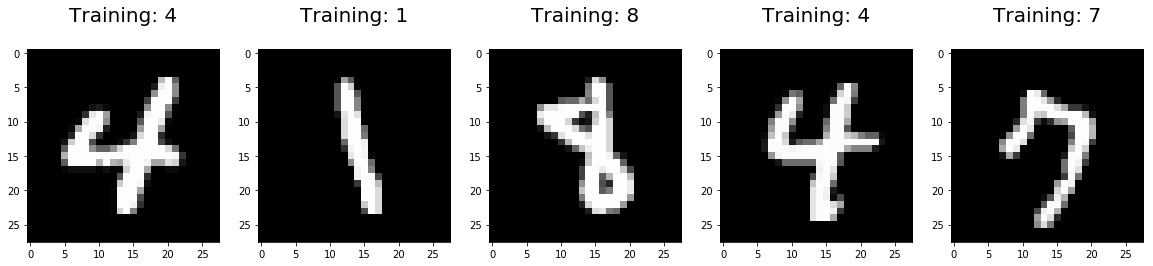

In [69]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
from sklearn.linear_model import LogisticRegression

In [22]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [7]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([1.])

In [9]:
logisticRegr.predict(test_img[0:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [10]:
predictions = logisticRegr.predict(test_img)

In [11]:
#Test Accuracy
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9134


In [12]:
#Train Accuracy
score = logisticRegr.score(train_img, train_lbl)
print(score)

0.9276333333333333


In [13]:
#misclassified digits
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

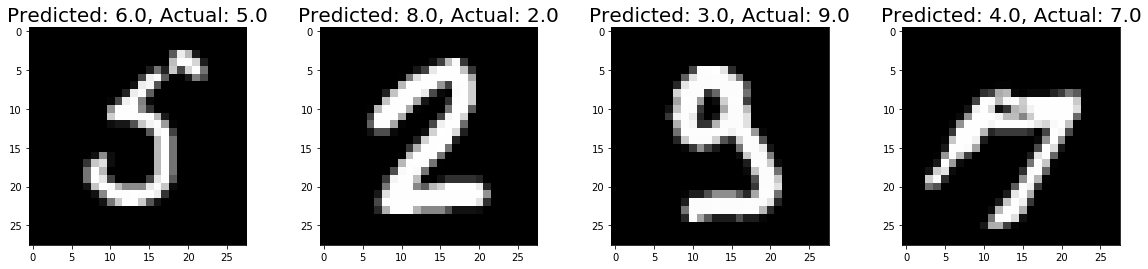

In [14]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 20)

In [15]:
#classified digits

index = 0
classifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label == predict: 
        classifiedIndexes.append(index)
    index +=1

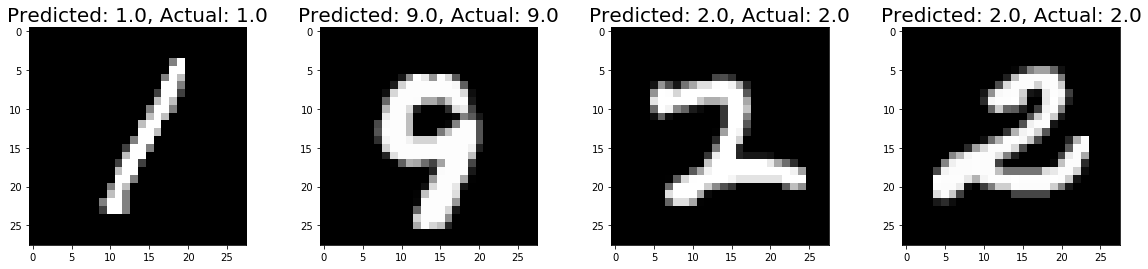

In [16]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(classifiedIndexes[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 20)

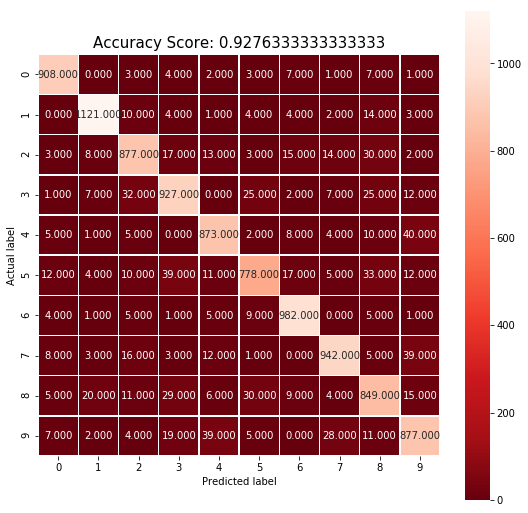

In [17]:
#accuracy shown in graph


import numpy as np 

import seaborn as sns
from sklearn import metrics




from sklearn.metrics import confusion_matrix
#cm = metrics.confusion_matrix(y_test, predictions)
cm = confusion_matrix(test_lbl, predictions)
acc = np.trace(cm)/ np.sum(cm)
#print( cm), print(acc)



plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

In [18]:
regr = LogisticRegression(solver = 'lbfgs')

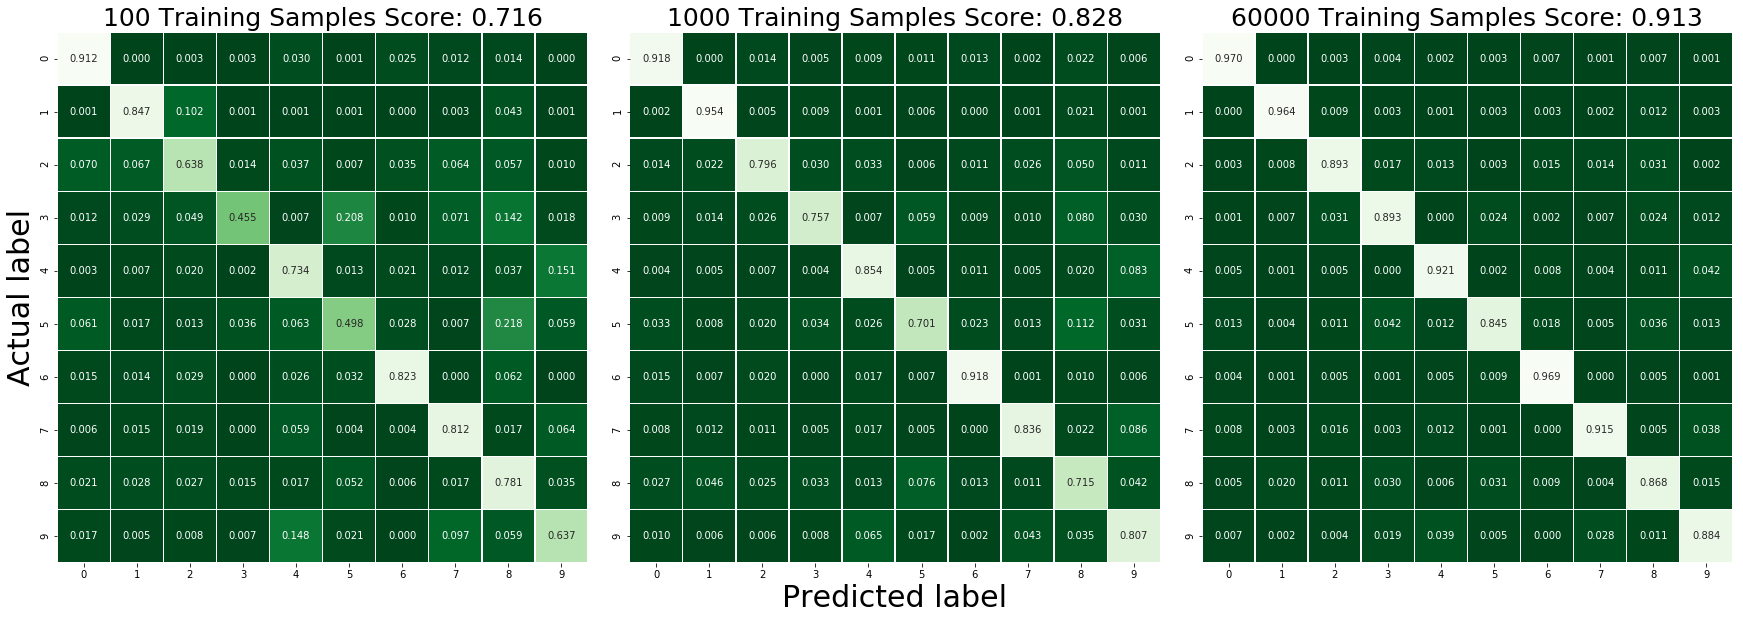

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (24,8));
plt.tight_layout()

for plotIndex, sample_size in enumerate([100, 1000, 60000]):
    X_train = train_img[:sample_size].reshape(sample_size, 784)
    y_train = train_lbl[:sample_size]
    regr.fit(X_train, y_train)
    predicted = regr.predict(test_img)
    cm = metrics.confusion_matrix(test_lbl, predicted)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r', ax = axes[plotIndex], cbar = False);
    accuracyString = '{:g} Training Samples Score: {:.3f}'.format(sample_size, regr.score(test_img, test_lbl)) 
    axes[plotIndex].set_title(accuracyString, size = 25);

axes[0].set_ylabel('Actual label', fontsize = 30);
axes[1].set_xlabel('Predicted label', fontsize = 30);

In [54]:
#this is how the computer sees the numbers as matrices

#print(train_img[0])
#print('for 1')



#print(train_img[1])

In [ ]:
#print(test_img[0])

In [26]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data=pd.read_csv("train.csv").as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [50]:
clf=DecisionTreeClassifier()
#train the data
xtrain=data[0:21000,1:]
train_label=data[0:21000,0]

clf.fit(xtrain,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predicted Digit=
[6]
Actual digit=


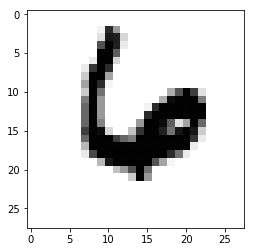

Predicted Digit=
[3]


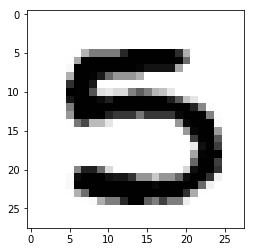

17634
83.97142857142858


In [53]:
#test the data
xtest=data[21000:,1:]
actual_label=data[21000:,0]

#row vector
d=xtest[0]
#reshaping it to 28 cost,28 matrices
d.shape=(28,28)
pt.imshow(255-d,cmap='gray')
print("Predicted Digit=")
print(clf.predict([xtest[0]]))


print("Actual digit=")
pt.show()

d=xtest[1]
d.shape=(28,28)
pt.imshow(255-d,cmap='gray')
print("Predicted Digit=")
print(clf.predict([xtest[1]]))
pt.show()


#prediction

p=clf.predict(xtest)

count=0

for i in range(0,21000):
    count+=1 if p[i]==actual_label[i] else 0
Accuracy=((count/21000)*100)
print(count)

print(Accuracy)

In [29]:
X, y = mnist['data'], mnist['target']
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [30]:
import numpy as np
shuffle_index = np.random.permutation(60000)

In [31]:
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [33]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [57]:
#from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LogisticRegression
sgd_clf = LogisticRegression(solver = 'lbfgs')

sgd_clf.fit(X_train,y_train_5)
#sgd_clf = logisticRegr(random_state=20)
#sgd_clf.fit()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9736 , 0.9744 , 0.97365])

In [61]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
       pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [62]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=5,scoring='accuracy')

array([0.90625   , 0.9115    , 0.91025   , 0.90983333, 0.91041667])

In [63]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)
y_train_pred

array([False, False, False, ..., False,  True, False])

In [64]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5,method='decision_function')

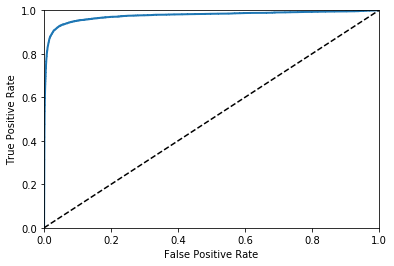

In [66]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()